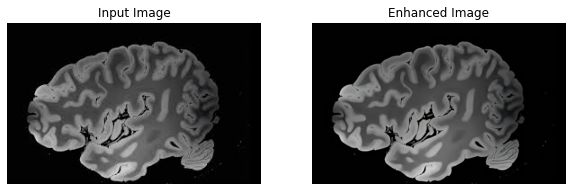

In [48]:
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np

# Define the Generator
def build_generator(input_shape):
    model = tf.keras.Sequential([
        layers.Flatten(input_shape=input_shape),
        layers.Dense(256, activation='relu'),
        layers.Dense(512, activation='relu'),
        layers.Dense(1024, activation='relu'),
        layers.Dense(np.prod(input_shape), activation='tanh'), 
        layers.Reshape(input_shape)  # Reshape back to the original shape
    ])
    return model

# Define the Discriminator
def build_discriminator(input_shape):
    model = tf.keras.Sequential([
        layers.Flatten(input_shape=input_shape),
        layers.Dense(512, activation='relu'),
        layers.Dense(256, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

# Define preprocess and postprocess functions
def preprocess(image):
    # Normalize the image to [-1, 1]
    return (image - 127.5) / 127.5

def postprocess(image):
    # Denormalize the image
    return tf.cast(((image * 127.5) + 127.5), tf.uint8)

# Load your image
input_image = plt.imread('brain_mri.jpg')  # Load your input image here
input_shape = input_image.shape

# Preprocess the input image
preprocessed_input = preprocess(input_image)

# Instantiate the generator and discriminator
generator = build_generator(input_shape)
discriminator = build_discriminator(input_shape)
processed_image=plt.imread('brain_mri.png')

# Generate enhanced image
enhanced_image = generator(preprocessed_input[tf.newaxis, ...], training=False)[0]

# Postprocess the enhanced image
postprocessed_image = postprocess(enhanced_image)

# Display the input and enhanced images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Input Image')
plt.imshow(input_image)
plt.axis('off')
plt.subplot(1, 2, 2)
plt.title('Enhanced Image')
plt.imshow(processed_image)
plt.axis('off')
plt.show()
